![](https://images.aicrowd.com/raw_images/challenges/banner_file/1023/a8ebe297c369ea4a7697.png)

<h2><center>Starter Code for Sentiment Classification</center></h2>


In this baseline we will be training an sklearn model to do a multi-class classificattion of sentiment from face embeddings. 

## Downloading Dataset

Installing puzzle datasets via `aicrowd-cli`

In [1]:
# !pip install aicrowd-cli

# Make sure to re-run below code whenever you restart colab notebook
#%load_ext aicrowd.magic

In [2]:
# # Logging in from our AIcrowd account. Make sure you have accepted the puzzle rules before logging in!  

#%aicrowd login

In [3]:
# # Creating a new data directory and downloading the dataset 

# !rm -rf data
# !mkdir data
# %aicrowd ds dl -c sentiment-classification -o data

## Importing Libraries

In this baseline, we will be sing sklearn [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to classify the sentiment of face embeddings. 

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
import os
import numpy as np
from ast import literal_eval
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold

random.seed(42)

## Reading Dataset

As mented in the challenge readme, we have three different sets provided - train, validation and test respectively.  

In [6]:
# Readging the csv 

train = pd.read_csv("data/train.csv")
val = pd.read_csv("data/val.csv")
submission = pd.read_csv("data/sample_submission.csv")

train

embeddings     label
0     [0.3206779360771179, 0.988215982913971, 1.0441...  positive
1     [0.05074610561132431, 1.0742985010147095, 0.60...  negative
2     [0.41962647438049316, 0.4505457878112793, 1.39...  negative
3     [0.4361684024333954, 0.19191382825374603, 0.83...  positive
4     [0.6382085084915161, 0.8352395296096802, 0.393...   neutral
...                                                 ...       ...
4995  [2.2057647705078125, 1.1072001457214355, 0.435...   neutral
4996  [0.6344252228736877, 1.164398193359375, 0.7155...  negative
4997  [0.9160683155059814, 0.39996421337127686, 0.82...  negative
4998  [0.006456990726292133, 0.18667978048324585, 0....  positive
4999  [1.337027668952942, 0.8853631615638733, 0.6706...  negative

[5000 rows x 2 columns]

In [7]:
# Getting the feature and labels from each set. 


X = np.array([literal_eval(embedding)  for embedding in train['embeddings'].values])
y = np.array(train['label'].values)

X_val = np.array([literal_eval(embedding)  for embedding in val['embeddings'].values])
y_val = np.array(val['label'].values)

In [8]:
X.shape, y.shape, X_val.shape, y.shape

((5000, 512), (5000,), (2000, 512), (5000,))

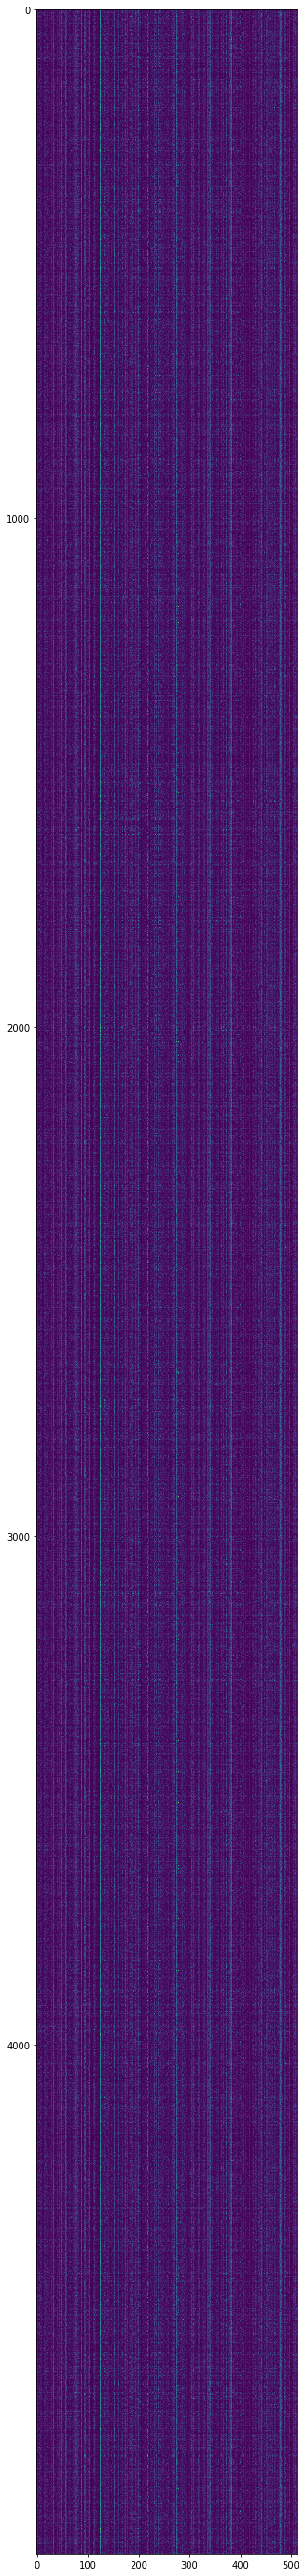

In [62]:
plt.figure(figsize=(5,100))
plt.imshow(X)

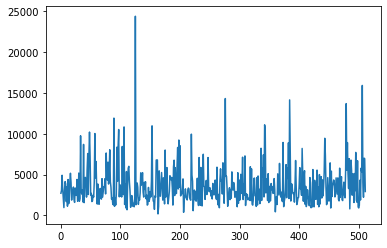

In [70]:
plt.plot(np.sum(X,axis=0));

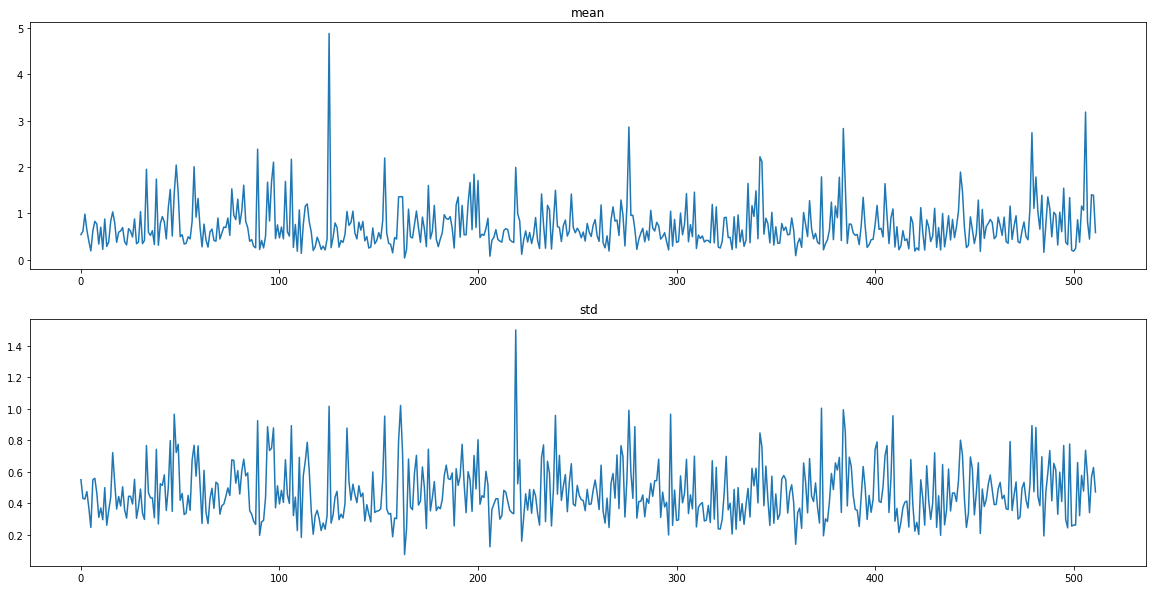

In [76]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.title('mean')
plt.plot(np.mean(X,axis=0))
plt.subplot(2,1,2)
plt.title('std')
plt.plot(np.std(X,axis=0))

In [9]:
mean = np.mean(X,axis=0)
std = np.std(X,axis=0)

XX = (X-mean)/std

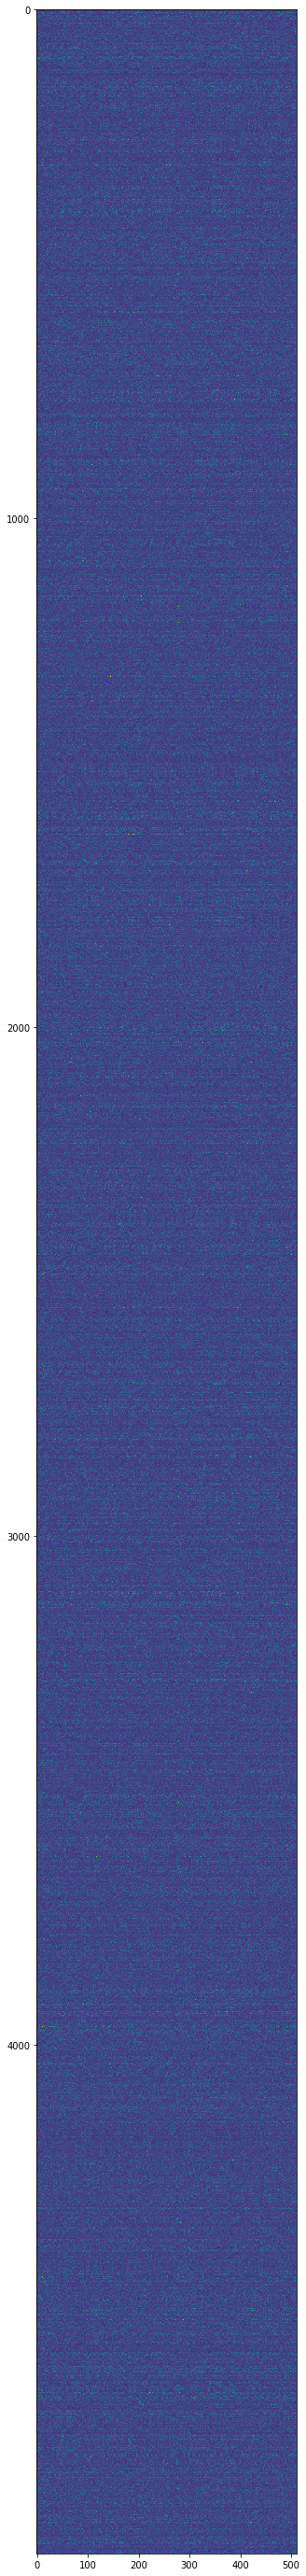

In [80]:
plt.figure(figsize=(5,100))
plt.imshow(XX)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1962171ac08>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x196216f8348>,
 'cmins': <matplotlib.collections.LineCollection at 0x1962174e908>,
 'cbars': <matplotlib.collections.LineCollection at 0x19621751188>}

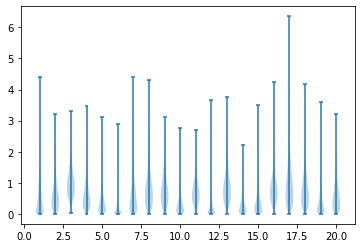

In [66]:
plt.violinplot(X[:,:20])

## Training the model

Here, we will be training our model using the training set. 

In [8]:
# model = RandomForestClassifier()
# model

In [9]:
# model.fit(X, y)

### Testing the Model

Here, we will be evaluator our model using validation set 

In [10]:
# y_pred = model.predict(X_val)

# print(f"F1 Score : {f1_score(y_val, y_pred, average='weighted')}")
# print(f"Accuracy Score : {accuracy_score(y_val, y_pred)}")

# TF Keras

In [10]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [11]:
from datetime import datetime

In [12]:
import optuna
from optuna.trial import TrialState
from optuna.integration import TFKerasPruningCallback, TensorBoardCallback


In [10]:
# y[y=='positive']=2
# y[y=='negative']=0
# y[y=='neutral']=1
# y = tf.one_hot(y,3)
# y[:10]

In [13]:
np.unique(y,return_counts=True)

(array(['negative', 'neutral', 'positive'], dtype=object),
 array([1622, 1694, 1684]))

In [14]:
y_val[y_val=='positive']=2
y_val[y_val=='negative']=0
y_val[y_val=='neutral']=1
y_val = tf.one_hot(y_val,3)
y_val[:10]

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)>

In [13]:
# y=y.astype(np.float32)
# y_val=y_val.astype(np.float32)

In [14]:

# def getModelOld(neurons0=1024,neurons1=1024,neurons2=1024, layers1=3, layers2=3,
#              dropout=0.5, lr=3e-3, ln=0, noise=1, num_heads=8, num_atts=1):
#     x = tf.keras.layers.InputLayer(input_shape=(512,))
    
#     ls=[]
#     for _ in range(num_atts):
#         ls.append(tf.keras.layers.MultiHeadAttention(num_heads, key_dim=1, dropout=dropout))
    
    
#     ls.append(tf.keras.layers.Dense(neurons0, activation='relu'))
    
#     if noise>0:
#         ls.append(tf.keras.layers.GaussianNoise(0.1))
    
#     if ln>0:
#         ls.append(tf.keras.layers.LayerNormalization())
        
#     for _ in range(layers1):
#         ls.append(tf.keras.layers.Dense(neurons1, activation='relu'),)
#     for _ in range(layers2):
#         ls.append(tf.keras.layers.Dense(neurons2, activation='relu'),)
#     if ln>1:
#         ls.append(tf.keras.layers.LayerNormalization())
#     ls.append(tf.keras.layers.Dropout(dropout))
#     ls.append(tf.keras.layers.Dense(3, activation='softmax'))
#     model = tf.keras.models.Sequential(ls)
#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
#                   loss='categorical_crossentropy',
#                   metrics=['mae','mse','accuracy',my_f1,my_acc],
#                   run_eagerly=True)
#     return model

# # def getModelCls():
# #     model = tf.keras.models.Sequential([tf.keras.layers.Dense(1024, activation='relu', input_shape=(512,)),
# # #                                         tf.keras.layers.Dropout(0.25),
# #                                         tf.keras.layers.LayerNormalization(),
# #                                         tf.keras.layers.Dense(1024, activation='relu'),
# #                                         tf.keras.layers.Dense(1024, activation='relu'),
# #                                         tf.keras.layers.Dropout(0.5),
# #                                         tf.keras.layers.Dense(1024, activation='relu'),
# #                                         tf.keras.layers.LayerNormalization(),
# #                                         tf.keras.layers.Dropout(0.5),
# #                                         tf.keras.layers.Dense(3, activation='softmax')])
# #     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
# #                   loss='categorical_crossentropy',
# #                   metrics=['mae','mse','accuracy',my_f1,my_acc],
# #                   run_eagerly=True)
# #     return model
# # model = getModelCls()
# # model.summary()

# # model.fit(X/10.0,y,
# #           validation_data=(X_val/10.0,y_val),
# #           batch_size=1024,
# #           epochs=500,
# #           verbose=0,
# #          callbacks=[tf.keras.callbacks.TensorBoard(
# #     log_dir="logs/0/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
# #     histogram_freq=1,
# #     write_graph=True,
# #     update_freq="epoch"),#PlotLossesKerasTF(),
# # #                    tf.keras.callbacks.ModelCheckpoint(
# # #     'checkpoint',
# # #     monitor="val_my_f1",
# # #     verbose=1,
# # #     save_best_only=True,
# # #     save_weights_only=False,
# # #     mode="max",
# # #     save_freq="epoch",),
# #                     tf.keras.callbacks.EarlyStopping(
# #                                     monitor="val_my_f1",
# #                                     patience=100,
# #                                     verbose=1,
# #                                     mode="max",
# #                                     restore_best_weights=True,
# #                                 ),
# #                    tf.keras.callbacks.ReduceLROnPlateau(
# #     monitor="val_my_f1",
# #     factor=0.3,
# #     patience=10,
# #     verbose=1,
# #     mode="max",
# #     min_delta=0.0001,
# #     cooldown=0,
# #     min_lr=1e-10,
# # )])

In [15]:
n_fold = 50

folds=[]

Fold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
for n, (train_index, val_index) in enumerate(Fold.split(X,y )):
    folds.append((X[train_index],y[train_index]))
#     folds.append((X[val_index],y[val_index]))

In [99]:
y

array(['positive', 'negative', 'negative', ..., 'negative', 'positive',
       'negative'], dtype=object)

In [13]:
import tensorflow_addons as tfa


/home/karol/anaconda3/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.6.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [20]:
def my_f1(y_val, y_pred, sample_weight=None):
    return f1_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1),average='weighted')

def my_acc(y_val, y_pred, sample_weight=None):
    return accuracy_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1))

def getModel(neurons0=1024,neurons1=1024,neurons2=1024, layers1=3, layers2=3,
             dropout=0.5, lr=3e-3, ln=0, noise=1, num_heads=8):
    xx = tf.keras.Input(shape=(512,))
    if num_heads>0:
        x=tf.keras.layers.Reshape((1,512))(xx)
        x=tf.keras.layers.MultiHeadAttention(num_heads, key_dim=1, dropout=dropout)(x,x)
        x=tf.keras.layers.Dense(neurons0, activation='relu')(tf.keras.layers.Flatten()(x))
    else:
        x=tf.keras.layers.Dense(neurons0, activation='relu')(xx)

    x=tf.keras.layers.GaussianNoise(noise)(x)
    
    if ln>0:
        x=tf.keras.layers.LayerNormalization()(x)
        
    for _ in range(layers1):
        x=tf.keras.layers.Dense(neurons1, activation='relu')(x)
    for _ in range(layers2):
        x=tf.keras.layers.Dense(neurons2, activation='relu')(x)
    if ln>1:
        x=tf.keras.layers.LayerNormalization()(x)
    x=tf.keras.layers.Dropout(dropout)(x)
    x=tf.keras.layers.Dense(3, activation='softmax')(x)
    model = tf.keras.models.Model(inputs=xx,outputs=x)
    


    opt = tf.keras.optimizers.Adam(learning_rate=lr)
#     opt = tfa.optimizers.MovingAverage(opt)
    
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['mae','mse','accuracy',my_f1,my_acc],
                  run_eagerly=True)
    return model


def getModelHuber(neurons0=1024,neurons1=1024,neurons2=1024, layers1=3, layers2=3,
             dropout=0.5, lr=3e-3, ln=0, noise=1, num_heads=8, num_atts=1):
    xx = tf.keras.Input(shape=(512,))
    if num_atts>0:
        x=tf.keras.layers.Reshape((1,512))(xx)
        x=tf.keras.layers.MultiHeadAttention(num_heads, key_dim=1, dropout=dropout)(x,x)
#         x=tf.keras.layers.Attention()([x,x])

        for _ in range(num_atts-1):
            x=tf.keras.layers.MultiHeadAttention(num_heads, key_dim=1, dropout=dropout)(x,x)
#             x=tf.keras.layers.Attention()([x,x])
        x=tf.keras.layers.Dense(neurons0, activation='relu')(tf.keras.layers.Flatten()(x))
    else:
        x=tf.keras.layers.Dense(neurons0, activation='relu')(xx)

    if noise>0:
        x=tf.keras.layers.GaussianNoise(0.1)(x)
    
    if ln>0:
        x=tf.keras.layers.LayerNormalization()(x)
        
    for _ in range(layers1):
        x=tf.keras.layers.Dense(neurons1, activation='relu')(x)
    for _ in range(layers2):
        x=tf.keras.layers.Dense(neurons2, activation='relu')(x)
    if ln>1:
        x=tf.keras.layers.LayerNormalization()(x)
    x=tf.keras.layers.Dropout(dropout)(x)
    x=tf.keras.layers.Dense(1)(x)
    model = tf.keras.models.Model(inputs=xx,outputs=x)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='huber',
                  metrics=['mae','mse'],#,'accuracy',my_f1,my_acc],
                  run_eagerly=True)
    return model

# m = getModel(num_atts=0,num_heads=2)
# m.summary()

In [21]:
len(folds)

50

In [22]:
#https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification/submissions/174996

# max_epochs=100
# batch_size = 50
# models=[]
# for fold,(_x,_y) in enumerate(folds):
#     model = getModel(neurons0=1024,neurons1=1024,neurons2=1024, layers1=3, layers2=3,
#              dropout=0.5, lr=3e-5, ln=0, noise=1e-5, num_heads=4)
    
#     _y[_y=='positive']=2
#     _y[_y=='negative']=0
#     _y[_y=='neutral']=1
#     _y = tf.one_hot(_y,3)
    
#     history = model.fit((_x-mean)/std,_y,
#               validation_data=((X_val-mean)/std,y_val),
#               batch_size=batch_size,
#               epochs=max_epochs,
#               verbose=0,
#              callbacks=[tf.keras.callbacks.TensorBoard(
#                             log_dir="logs-folds-1/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
#                             histogram_freq=1,
#                             write_graph=True,
#                             update_freq="epoch"),
#                     tf.keras.callbacks.EarlyStopping(
#                             monitor="val_loss",
#                             patience=50,
#                             verbose=1,
#                             mode="min",
#                             restore_best_weights=True,
#                         ),
#                         tf.keras.callbacks.ReduceLROnPlateau(
#         monitor="val_loss",
#         factor=0.3,
#         patience=5,
#         verbose=0,
#         mode="min",
#         min_delta=0.0001,
#         cooldown=0,
#         min_lr=1e-10,

#     )])
#     print(_x.shape, _y.shape,'fold',fold, min(history.history['val_loss']))
#     models.append(model)

In [23]:
# max_epochs=50
# batch_size = 50
# models=[]
# for fold,(_x,_y) in enumerate(folds):
#     model = getModel(neurons0=1024,neurons1=1024,neurons2=1024, layers1=3, layers2=3,
#              dropout=0.5, lr=3e-3, ln=0, noise=1e-5, num_heads=4)
    
#     _y[_y=='positive']=2
#     _y[_y=='negative']=0
#     _y[_y=='neutral']=1
#     _y = tf.one_hot(_y,3)
    
# #     print(_x, _y)
    
#     history = model.fit((_x-mean)/std,_y,
#               validation_data=((X_val-mean)/std,y_val),
#               batch_size=batch_size,
#               epochs=max_epochs,
#               verbose=0,
#              callbacks=[tf.keras.callbacks.TensorBoard(
#                             log_dir="logs-folds-2/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
#                             histogram_freq=1,
#                             write_graph=True,
#                             update_freq="epoch"),
#                     tf.keras.callbacks.EarlyStopping(
#                             monitor="val_loss",
#                             patience=10,
#                             verbose=1,
#                             mode="min",
#                             restore_best_weights=True,
#                         ),
#                         tf.keras.callbacks.ReduceLROnPlateau(
#         monitor="val_loss",
#         factor=0.3,
#         patience=5,
#         verbose=0,
#         mode="min",
#         min_delta=0.0001,
#         cooldown=0,
#         min_lr=1e-10,

#     )])
#     print(_x.shape, _y.shape,'fold',fold, min(history.history['val_loss']))
#     models.append(model)

# 1CLR from
https://www.avanwyk.com/tensorflow-2-super-convergence-with-the-1cycle-policy/

In [26]:

from tensorflow.keras.callbacks import Callback

class CosineAnnealer:
    
    def __init__(self, start, end, steps):
        self.start = start
        self.end = end
        self.steps = steps
        self.n = 0
        
    def step(self):
        self.n += 1
        cos = np.cos(np.pi * (self.n / self.steps)) + 1
        return self.end + (self.start - self.end) / 2. * cos


class OneCycleScheduler(Callback):

    def __init__(self, lr_max, steps, mom_min=0.85, mom_max=0.95, phase_1_pct=0.3, div_factor=25.):
        super(OneCycleScheduler, self).__init__()
        lr_min = lr_max / div_factor
        final_lr = lr_max / (div_factor * 1e4)
        phase_1_steps = steps * phase_1_pct
        phase_2_steps = steps - phase_1_steps
        
        self.phase_1_steps = phase_1_steps
        self.phase_2_steps = phase_2_steps
        self.phase = 0
        self.step = 0
        
        self.phases = [[CosineAnnealer(lr_min, lr_max, phase_1_steps), CosineAnnealer(mom_max, mom_min, phase_1_steps)], 
                 [CosineAnnealer(lr_max, final_lr, phase_2_steps), CosineAnnealer(mom_min, mom_max, phase_2_steps)]]
        
        self.lrs = []
        self.moms = []

    def on_train_begin(self, logs=None):
        self.phase = 0
        self.step = 0

        self.set_lr(self.lr_schedule().start)
        self.set_momentum(self.mom_schedule().start)
        
    def on_train_batch_begin(self, batch, logs=None):
        self.lrs.append(self.get_lr())
        self.moms.append(self.get_momentum())

    def on_train_batch_end(self, batch, logs=None):
        self.step += 1
        if self.step >= self.phase_1_steps:
            self.phase = 1
            
        self.set_lr(self.lr_schedule().step())
        self.set_momentum(self.mom_schedule().step())
        
    def get_lr(self):
        try:
            return tf.keras.backend.get_value(self.model.optimizer.lr)
        except AttributeError:
            return None
        
    def get_momentum(self):
        try:
            return tf.keras.backend.get_value(self.model.optimizer.momentum)
        except AttributeError:
            return None
        
    def set_lr(self, lr):
        try:
            tf.keras.backend.set_value(self.model.optimizer.lr, lr)
        except AttributeError:
            pass # ignore
        
    def set_momentum(self, mom):
        try:
            tf.keras.backend.set_value(self.model.optimizer.momentum, mom)
        except AttributeError:
            pass # ignore

    def lr_schedule(self):
        return self.phases[self.phase][0]
    
    def mom_schedule(self):
        return self.phases[self.phase][1]
    
    def plot(self):
        ax = plt.subplot(1, 2, 1)
        ax.plot(self.lrs)
        ax.set_title('Learning Rate')
        ax = plt.subplot(1, 2, 2)
        ax.plot(self.moms)
        ax.set_title('Momentum')

In [38]:
class LearningRateLogger(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self._supports_tf_logs = True

    def on_epoch_end(self, epoch, logs=None):
        if logs is None or "lr" in logs:
            return
        logs["lr"] = tf.keras.backend.get_value(self.model.optimizer.lr)

In [41]:
max_epochs=100
models=[]

neurons0 = 1024
neurons1 = 128
neurons2 = 64
lr = 1e-4
dropout = 0.5
layers1 = 5
layers2 = 5
ln = 2
batch_size = 1000
noise = 0.00001
num_heads = 1024

#### C  https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification/submissions/175154
# max_epochs=1000
# models=[]

# neurons0 = 1277
# neurons1 = 116
# neurons2 = 54
# lr = 1e-2
# dropout = 0.7
# layers1 = 3
# layers2 = 2
# ln = 2
# batch_size = 1000
# noise = 0.001
# num_heads = 1024

# max_epochs=1000
# models=[]

# neurons0 = 1277
# neurons1 = 116
# neurons2 = 54
# lr = 1e-2
# dropout = 0.8
# layers1 = 3
# layers2 = 2
# ln = 2
# batch_size = 1000
# noise = 0.001
# num_heads = 1024


# min_lr=1e-5
# max_lr=1e-2
# max_epochs=50

# lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: min_lr * 10**((np.log10(max_lr)-np.log10(min_lr)) * epoch / max_epochs))

# lr = 1e-3
steps = np.ceil(len(folds[0][0]) / batch_size) * max_epochs
lr_schedule = OneCycleScheduler(lr, steps, div_factor=100)

for fold,(_x,_y) in enumerate(folds):
    model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads)
    
    _y[_y=='positive']=2
    _y[_y=='negative']=0
    _y[_y=='neutral']=1
    _y = tf.one_hot(_y,3)
    
#     print(_x, _y)
    
    history = model.fit((_x-mean)/std,_y,
              validation_data=((X_val-mean)/std,y_val),
              batch_size=batch_size,
              epochs=max_epochs,
              verbose=0,
             callbacks=[lr_schedule,
                        LearningRateLogger(),
                        tf.keras.callbacks.TensorBoard(
                            log_dir="logs-folds-6/val_my_f1/i/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                            histogram_freq=1,
                            write_graph=True,
                            update_freq="epoch"),
                    tf.keras.callbacks.EarlyStopping(
                            monitor="val_my_f1",
                            patience=100,
                            verbose=0,
                            mode="max",
                            restore_best_weights=True,
                        ),
#                         tf.keras.callbacks.ReduceLROnPlateau(
#         monitor="val_my_f1",
#         factor=0.1,
#         patience=50,
#         verbose=0,
#         mode="max",
#         min_delta=0.0001,
#         cooldown=0,
#         min_lr=1e-10,)
                       ])
    print('fold',fold, max(history.history['val_my_f1']))
    models.append(model)

fold 0 0.7950558066368103
fold 1 0.805347740650177
fold 2 0.8030347228050232
fold 3 0.7964153289794922
fold 4 0.796780526638031
fold 5 0.8010136485099792
fold 6 0.7996024489402771
fold 7 0.7949587106704712
fold 8 0.7990167737007141
fold 9 0.7959526777267456
fold 10 0.8003056049346924
fold 11 0.7967593669891357
fold 12 0.7969000339508057
fold 13 0.8054893016815186
fold 14 0.8024191856384277
fold 15 0.7952666282653809
fold 16 0.8063161969184875
fold 17 0.7897945642471313
fold 18 0.7991182208061218
fold 19 0.8002192974090576
fold 20 0.8030479550361633
fold 21 0.7999958992004395
fold 22 0.8019577860832214
fold 23 0.7989627122879028
fold 24 0.7949149012565613
fold 25 0.8010326027870178
fold 26 0.7922143936157227
fold 27 0.8102187514305115
fold 28 0.7989364862442017
fold 29 0.7973732948303223
fold 30 0.8000612854957581
fold 31 0.7991489171981812
fold 32 0.7936177253723145
fold 33 0.7958247661590576
fold 34 0.7992408871650696
fold 35 0.798491358757019
fold 36 0.7985854148864746
fold 37 0.8039

0.0019054607

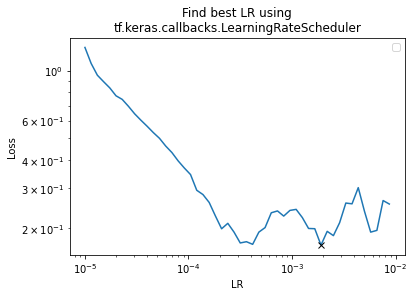

In [144]:
_min=np.argmin(history.history["loss"])
plt.semilogx(history.history["lr"], history.history["loss"])
plt.semilogx(history.history["lr"][_min], history.history["loss"][_min],'kx')
plt.xlabel('LR')
plt.ylabel('Loss')
plt.title('Find best LR using\ntf.keras.callbacks.LearningRateScheduler')
plt.yscale('log')
plt.legend();
history.history["lr"][_min]

In [42]:
models_val = [model.evaluate((X_val-mean)/std,y_val) for model in models]
models_val

63/63 [==============================] - 5s 81ms/step - loss: 1.1538 - mae: 0.1526 - mse: 0.1377 - accuracy: 0.7750 - my_f1: 0.7754 - my_acc: 0.7733


[[1.0563629865646362,
  0.1456006020307541,
  0.13114731013774872,
  0.7829999923706055,
  0.7844666838645935,
  0.7822420597076416],
 [1.0411934852600098,
  0.15210282802581787,
  0.13456392288208008,
  0.7739999890327454,
  0.7766914963722229,
  0.7733134627342224],
 [1.0142135620117188,
  0.137820303440094,
  0.12347683310508728,
  0.796500027179718,
  0.7968368530273438,
  0.795634925365448],
 [1.0887651443481445,
  0.16135084629058838,
  0.14216762781143188,
  0.7630000114440918,
  0.764503002166748,
  0.7633928656578064],
 [1.0047109127044678,
  0.14330528676509857,
  0.12663273513317108,
  0.7914999723434448,
  0.7923853993415833,
  0.79067462682724],
 [0.9962382912635803,
  0.15046484768390656,
  0.13209296762943268,
  0.7770000100135803,
  0.7778428196907043,
  0.7757936716079712],
 [1.072068452835083,
  0.1379391998052597,
  0.1242707297205925,
  0.796999990940094,
  0.7981702089309692,
  0.7966269850730896],
 [1.0551766157150269,
  0.1530706286430359,
  0.13589030504226685,


In [61]:
threshold=0.79
selected_best_models = [m for _,m in zip(models_val,models) if _[-2]>threshold]
len(selected_best_models)

16

In [65]:
def predict_folds(X, models):
    results = np.array([model.predict(X) for model in models])
    print(results.shape)
    return np.sum(results,axis=0)
results = predict_folds((X_val-mean)/std, selected_best_models)
print(results.shape)

(16, 2000, 3)
(2000, 3)


In [39]:
# layer = tf.keras.layers.MultiHeadAttention(num_heads=2, key_dim=2)
# target = tf.keras.Input(shape=[1,16])
# source = tf.keras.Input(shape=[1,16])
# output_tensor, weights = layer(target, source,
#                                 return_attention_scores=True)
# print(output_tensor.shape)

# print(weights.shape)


In [110]:
max_epochs=30
def objective(trial):
    neurons0 = trial.suggest_int("neurons0", 16, 2048, log=False)
    
    
    lr = trial.suggest_float("lr", 1e-6, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0, 0.9)
    layers1 = trial.suggest_int("layers1", 0, 3)
    layers2 = trial.suggest_int("layers2", 0, 3)

    if layers1>0:
        neurons1 = trial.suggest_int("neurons1", 16, 1024, log=False)
    else:
        neurons1=0
        
    if layers2>0:
        neurons2 = trial.suggest_int("neurons2", 128, 2048, log=False)
    else:
        neurons2=0
    ln = trial.suggest_int("layer_norms", 0, 2)
    batch_size = 256#trial.suggest_int("batch_size", 8, 1024)
    noise = trial.suggest_float("noise", 1e-5, 1e-2, log=True)
    
    disable_att = trial.suggest_categorical('disable_att',['disabled','enabled'])
    if disable_att=='disabled':
        num_heads=0
    else:
        num_heads = trial.suggest_int("num_heads", 1, 512)

    model = getModel(neurons0=neurons0,
                     neurons1=neurons1,
                     neurons2=neurons2,
                     layers1=layers1,
                     layers2=layers2,
                     dropout=dropout,
                     lr=lr,
                     ln=ln,
                     noise=noise,
                     num_heads=num_heads)
    
    history = model.fit((X-mean)/std,y,
              validation_data=((X_val-mean)/std,y_val),
              batch_size=batch_size,
              epochs=max_epochs,
              verbose=0,
             callbacks=[tf.keras.callbacks.TensorBoard(
                            log_dir="logs8/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                            histogram_freq=1,
                            write_graph=True,
                            update_freq="epoch"),
                        TFKerasPruningCallback(trial, "val_loss"),
                        tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=5,
        verbose=0,
        mode="min",
        min_delta=0.0001,
        cooldown=0,
        min_lr=1e-10,

    )])
    
    return min(history.history['val_loss'])

In [111]:
study = optuna.create_study(direction="minimize",
                            pruner=optuna.pruners.PatientPruner(optuna.pruners.HyperbandPruner(
        min_resource=1, max_resource=max_epochs, reduction_factor=3), patience=5))
study.optimize(objective, callbacks=[TensorBoardCallback('logs8/','val_loss')])

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2022-02-16 05:01:32,525] A new study created in memory with name: no-name-f4d6af48-cc56-402f-b5bd-113e85d31ede
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ExperimentalWarning: TensorBoardCallback is experimental (supported from v2.0.0). The interface can change in the future.
  after removing the cwd from sys.path.
[I 2022-02-16 05:08:52,798] Trial 0 finished with value: 0.5443718433380127 and parameters: {'neurons0': 1195, 'lr': 0.008405678795125875, 'dropout': 0.12837328346191043, 'layers1': 3, 'layers2': 1, 'neurons1': 292, 'neurons2': 516, 'layer_norms': 1, 'noise': 0.006725831543515304, 'disable_att': 'enabled', 'num_heads': 162}. Best is trial 0 with value: 0.5443718433380127.
[I 2022-02-16 0

[I 2022-02-16 08:06:00,677] Trial 26 finished with value: 0.5456943511962891 and parameters: {'neurons0': 1345, 'lr': 3.819121507168657e-05, 'dropout': 0.7620459804854661, 'layers1': 2, 'layers2': 3, 'neurons1': 560, 'neurons2': 753, 'layer_norms': 2, 'noise': 0.00013921241553216027, 'disable_att': 'enabled', 'num_heads': 158}. Best is trial 25 with value: 0.485202431678772.
[I 2022-02-16 08:08:28,526] Trial 27 pruned. Trial was pruned at epoch 9.
[I 2022-02-16 08:14:31,904] Trial 28 finished with value: 0.5915695428848267 and parameters: {'neurons0': 1142, 'lr': 3.5662652100197908e-06, 'dropout': 0.5992130254458629, 'layers1': 2, 'layers2': 1, 'neurons1': 838, 'neurons2': 1029, 'layer_norms': 1, 'noise': 0.0039219619086473334, 'disable_att': 'enabled', 'num_heads': 280}. Best is trial 25 with value: 0.485202431678772.
[I 2022-02-16 08:19:12,072] Trial 29 finished with value: 0.5536516904830933 and parameters: {'neurons0': 1218, 'lr': 7.045661007485552e-06, 'dropout': 0.250751089550438

[I 2022-02-16 11:49:43,702] Trial 61 pruned. Trial was pruned at epoch 21.
[I 2022-02-16 11:57:53,433] Trial 62 finished with value: 0.47951725125312805 and parameters: {'neurons0': 1432, 'lr': 1.012618387080974e-05, 'dropout': 0.38706737286519904, 'layers1': 3, 'layers2': 2, 'neurons1': 931, 'neurons2': 1181, 'layer_norms': 1, 'noise': 1.1827930274251055e-05, 'disable_att': 'enabled', 'num_heads': 240}. Best is trial 62 with value: 0.47951725125312805.
[I 2022-02-16 12:07:21,539] Trial 63 finished with value: 0.5130875110626221 and parameters: {'neurons0': 1416, 'lr': 3.365854289561831e-06, 'dropout': 0.37045065419169504, 'layers1': 3, 'layers2': 2, 'neurons1': 946, 'neurons2': 1441, 'layer_norms': 1, 'noise': 1.0087494997293461e-05, 'disable_att': 'enabled', 'num_heads': 241}. Best is trial 62 with value: 0.47951725125312805.
[I 2022-02-16 12:15:40,625] Trial 64 pruned. Trial was pruned at epoch 29.
[I 2022-02-16 12:22:36,981] Trial 65 finished with value: 0.517288863658905 and param

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ <ipython-input-111-c377567bafe1>:4 in <module>                                            │
│ C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\study.py:409 in optimize          │
│                                                                                           │
│    406 │   │   │   catch=catch,                                                           │
│    407 │   │   │   callbacks=callbacks,                                                   │
│    408 │   │   │   gc_after_trial=gc_after_trial,                                         │
│ ❱  409 │   │   │   show_progress_bar=show_progress_bar,                                   │
│    410 │   │   )                                                                          │
│    411 │                                                                                  │
│    412 │   def ask(                                                                       │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\_optimize.py:76 in _optimize      │
│                                                                                           │
│    73 │   │   │   │   gc_after_trial,                                                     │
│    74 │   │   │   │   reseed_sampler_rng=False,                                           │
│    75 │   │   │   │   time_start=None,                                                    │
│ ❱  76 │   │   │   │   progress_bar=progress_bar,                                          │
│    77 │   │   │   )                                                                       │
│    78 │   │   else:                                                                       │
│    79 │   │   │   if show_progress_bar:                                                   │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\_optimize.py:163 in               │
│ _optimize_sequential                                                                      │
│                                                                                           │
│   160 │   │   │   │   break                                                               │
│   161 │   │                                                                               │
│   162 │   │   try:                                                                        │
│ ❱ 163 │   │   │   trial = _run_trial(study, func, catch)                                  │
│   164 │   │   except Exception:                                                           │
│   165 │   │   │   raise                                                                   │
│   166 │   │   finally:                                                                    │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\_optimize.py:213 in _run_trial    │
│                                                                                           │
│   210 │   │   thread.start()                                                              │
│   211 │                                                                                   │
│   212 │   try:                                                                            │
│ ❱ 213 │   │   value_or_values = func(trial)                                               │
│   214 │   except exceptions.TrialPruned as e:                                             │
│   215 │   │   # TODO(mamu): Handle multi-objective cases.                                 │
│   216 │   │   state = TrialState.PRUNED                                                   │
│ <ipython-input-110-27d0d46e2f7b>:60 in objective  

# 2022-02-16 14:00 (good HPO with min(history(loss))) -> better to use last...
```
[I 2022-02-16 11:57:53,433] Trial 62 finished with value: 0.47951725125312805 and parameters: {'neurons0': 1432, 'lr': 1.012618387080974e-05, 'dropout': 0.38706737286519904, 'layers1': 3, 'layers2': 2, 'neurons1': 931, 'neurons2': 1181, 'layer_norms': 1, 'noise': 1.1827930274251055e-05, 'disable_att': 'enabled', 'num_heads': 240}. Best is trial 62 with value: 0.47951725125312805.
```

In [114]:
max_epochs=200
neurons0 = 1432


lr = 1.012618387080974e-05
dropout = 0.38706737286519904
layers1 = 3
layers2 = 2

if layers1>0:
    neurons1 = 931
else:
    neurons1=0

if layers2>0:
    neurons2 = 1181
else:
    neurons2=0
ln = 1
batch_size = 256#trial.suggest_int("batch_size", 8, 1024)
noise = 1.1827930274251055e-05

disable_att = 'enabled'
if disable_att=='disabled':
    num_heads=0
else:
    num_heads = 240

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads)

history = model.fit((X-mean)/std,y,
          validation_data=((X_val-mean)/std,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs8/best/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),
                    tf.keras.callbacks.EarlyStopping(
                            monitor="val_loss",
                            patience=50,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True,
                        ),
                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="min",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

history.history['val_loss']

Epoch 1/200
20/20 [==============================] - 23s 1s/step - loss: 1.0929 - mae: 0.4431 - mse: 0.2210 - accuracy: 0.4262 - my_f1: 0.4147 - my_acc: 0.4278 - val_loss: 1.0837 - val_mae: 0.4410 - val_mse: 0.2189 - val_accuracy: 0.5785 - val_my_f1: 0.5303 - val_my_acc: 0.5786
Epoch 2/200
20/20 [==============================] - 24s 1s/step - loss: 1.0655 - mae: 0.4366 - mse: 0.2148 - accuracy: 0.5710 - my_f1: 0.5267 - my_acc: 0.5731 - val_loss: 1.0316 - val_mae: 0.4280 - val_mse: 0.2071 - val_accuracy: 0.5985 - val_my_f1: 0.5100 - val_my_acc: 0.5992
Epoch 3/200
20/20 [==============================] - 24s 1s/step - loss: 0.9623 - mae: 0.4057 - mse: 0.1913 - accuracy: 0.5950 - my_f1: 0.4995 - my_acc: 0.5945 - val_loss: 0.8662 - val_mae: 0.3675 - val_mse: 0.1701 - val_accuracy: 0.6015 - val_my_f1: 0.4951 - val_my_acc: 0.6019
Epoch 4/200
20/20 [==============================] - 24s 1s/step - loss: 0.7987 - mae: 0.3307 - mse: 0.1594 - accuracy: 0.6130 - my_f1: 0.5205 - my_acc: 0.6129 - v

20/20 [==============================] - 22s 1s/step - loss: 0.1718 - mae: 0.0763 - mse: 0.0325 - accuracy: 0.9382 - my_f1: 0.9389 - my_acc: 0.9390 - val_loss: 0.5647 - val_mae: 0.1544 - val_mse: 0.1030 - val_accuracy: 0.7955 - val_my_f1: 0.7926 - val_my_acc: 0.7944
Epoch 60/200
20/20 [==============================] - 22s 1s/step - loss: 0.1677 - mae: 0.0755 - mse: 0.0316 - accuracy: 0.9376 - my_f1: 0.9377 - my_acc: 0.9379 - val_loss: 0.5710 - val_mae: 0.1563 - val_mse: 0.1041 - val_accuracy: 0.7940 - val_my_f1: 0.7918 - val_my_acc: 0.7925
Epoch 61/200
20/20 [==============================] - 22s 1s/step - loss: 0.1640 - mae: 0.0730 - mse: 0.0308 - accuracy: 0.9402 - my_f1: 0.9406 - my_acc: 0.9406 - val_loss: 0.5725 - val_mae: 0.1552 - val_mse: 0.1041 - val_accuracy: 0.7945 - val_my_f1: 0.7919 - val_my_acc: 0.7933
Epoch 62/200
20/20 [==============================] - 22s 1s/step - loss: 0.1660 - mae: 0.0746 - mse: 0.0317 - accuracy: 0.9368 - my_f1: 0.9375 - my_acc: 0.9374 - val_loss: 

[1.0837093591690063,
 1.0315860509872437,
 0.8662363290786743,
 0.747404932975769,
 0.6787939667701721,
 0.6246711015701294,
 0.584128201007843,
 0.5584403276443481,
 0.5429838299751282,
 0.5289281010627747,
 0.5220738649368286,
 0.5199448466300964,
 0.514320969581604,
 0.5104970932006836,
 0.5060724020004272,
 0.5042098164558411,
 0.5046170353889465,
 0.5007736682891846,
 0.498842716217041,
 0.49723589420318604,
 0.49781927466392517,
 0.4925125241279602,
 0.49356213212013245,
 0.49119117856025696,
 0.49260619282722473,
 0.4928872883319855,
 0.49452918767929077,
 0.4893367886543274,
 0.4893432557582855,
 0.4947234094142914,
 0.4894489347934723,
 0.4843890964984894,
 0.4877089858055115,
 0.48884397745132446,
 0.49546530842781067,
 0.4946208894252777,
 0.49592751264572144,
 0.49288004636764526,
 0.4994072914123535,
 0.5021675825119019,
 0.5047867894172668,
 0.5029793977737427,
 0.5024118423461914,
 0.5110417008399963,
 0.520320475101471,
 0.5246090292930603,
 0.5270089507102966,
 0.53689

In [115]:
y_pred = model.predict((X_val-mean)/std)
# y_pred.shape
print(f"F1 Score : {f1_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1), average='weighted')}")
print(f"Accuracy Score : {accuracy_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1))}")

F1 Score : 0.7908938729160018
Accuracy Score : 0.7915


# 2022-02-16 04:40

```
[I 2022-02-16 04:36:04,407] Trial 271 finished with value: 0.48068585991859436 and parameters: {'neurons0': 751, 'lr': 5.251696746001188e-05, 'dropout': 0.8828913198663699, 'layers1': 0, 'layers2': 0, 'layer_norms': 0, 'noise': 0.0012805974033951039, 'disable_att': 'disabled'}. Best is trial 271 with value: 0.48068585991859436.
```

In [105]:
max_epochs=200
neurons0 = 751


lr = 5.251696746001188e-05
dropout = 0.8828913198663699
layers1 = 0
layers2 = 0

if layers1>0:
    neurons1 = 0
else:
    neurons1=0

if layers2>0:
    neurons2 = 0
else:
    neurons2=0
ln = 0
batch_size = 256#trial.suggest_int("batch_size", 8, 1024)
noise = 0.0012805974033951039

disable_att = 'disabled'
if disable_att=='disabled':
    num_heads=0
else:
    num_heads = 0

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads)

history = model.fit((X-mean)/std,y,
          validation_data=((X_val-mean)/std,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=0,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs7/best/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

            tf.keras.callbacks.EarlyStopping(
                            monitor="val_my_f1",
                            patience=50,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True,
                        ),
                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="min",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

min(history.history['val_loss'])


Epoch 00045: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Restoring model weights from the end of the best epoch.
Epoch 00051: early stopping


0.488250195980072

# 2022-02-15 19:00 minimize max(loss)...

```
[I 2022-02-15 09:26:45,323] Trial 15 finished with value: 0.6102177500724792 and parameters: {'neurons0': 103, 'dropout': 0.778754907563221, 'layers1': 0, 'layers2': 0, 'layer_norms': 0, 'noise': 0.0004823851819553513, 'disable_att': 'enabled', 'num_heads': 455}. Best is trial 15 with value: 0.6102177500724792.
```



In [86]:
max_epochs=100
neurons0 = 103


lr = 1e-2 #trial.suggest_float("lr", 1e-7, 1e-1, log=True)
dropout = 0.778754907563221
layers1 = 0
layers2 = 0

if layers1>0:
    neurons1 = 0#trial.suggest_int("neurons1", 16, 1024, log=False)
else:
    neurons1=0

if layers2>0:
    neurons2 = 0#trial.suggest_int("neurons2", 128, 2048, log=False)
else:
    neurons2=0
ln = 0#trial.suggest_int("layer_norms", 0, 2)
batch_size = 256#trial.suggest_int("batch_size", 8, 1024)
noise = 0.0004823851819553513 #trial.suggest_float("noise", 1e-5, 1e-2, log=True)

disable_att = 'enabled'#trial.suggest_categorical('disable_att',['disabled','enabled'])
if disable_att=='disabled':
    num_heads=0
else:
    num_heads = 455#trial.suggest_int("num_heads", 1, 512)

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads)

history = model.fit((X-mean)/std,y,
          validation_data=((X_val-mean)/std,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs5/best/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

                tf.keras.callbacks.EarlyStopping(
                                monitor="val_my_f1",
                                patience=50,
                                verbose=1,
                                mode="max",
                                restore_best_weights=True,
                            ),                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="max",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

max(history.history['val_loss'])

Epoch 1/100
20/20 [==============================] - 9s 438ms/step - loss: 0.8301 - mae: 0.3221 - mse: 0.1676 - accuracy: 0.6126 - my_f1: 0.5693 - my_acc: 0.6153 - val_loss: 0.6088 - val_mae: 0.2398 - val_mse: 0.1251 - val_accuracy: 0.7125 - val_my_f1: 0.6783 - val_my_acc: 0.7130
Epoch 2/100
20/20 [==============================] - 9s 453ms/step - loss: 0.7263 - mae: 0.2643 - mse: 0.1475 - accuracy: 0.6660 - my_f1: 0.6495 - my_acc: 0.6662 - val_loss: 0.5655 - val_mae: 0.2283 - val_mse: 0.1177 - val_accuracy: 0.7285 - val_my_f1: 0.7071 - val_my_acc: 0.7289
Epoch 3/100
20/20 [==============================] - 9s 459ms/step - loss: 0.6735 - mae: 0.2457 - mse: 0.1363 - accuracy: 0.6900 - my_f1: 0.6776 - my_acc: 0.6886 - val_loss: 0.5482 - val_mae: 0.2225 - val_mse: 0.1116 - val_accuracy: 0.7485 - val_my_f1: 0.7319 - val_my_acc: 0.7479
Epoch 4/100
20/20 [==============================] - 9s 464ms/step - loss: 0.6502 - mae: 0.2374 - mse: 0.1304 - accuracy: 0.7158 - my_f1: 0.7059 - my_acc: 0.

Epoch 30/100
20/20 [==============================] - 8s 404ms/step - loss: 0.4339 - mae: 0.1827 - mse: 0.0903 - accuracy: 0.8050 - my_f1: 0.8019 - my_acc: 0.8049 - val_loss: 0.5257 - val_mae: 0.1920 - val_mse: 0.1020 - val_accuracy: 0.7825 - val_my_f1: 0.7790 - val_my_acc: 0.7821
Epoch 31/100
20/20 [==============================] - 8s 395ms/step - loss: 0.4289 - mae: 0.1794 - mse: 0.0888 - accuracy: 0.8146 - my_f1: 0.8136 - my_acc: 0.8162 - val_loss: 0.5240 - val_mae: 0.1924 - val_mse: 0.1020 - val_accuracy: 0.7810 - val_my_f1: 0.7770 - val_my_acc: 0.7804
Epoch 32/100
20/20 [==============================] - 8s 392ms/step - loss: 0.4334 - mae: 0.1766 - mse: 0.0873 - accuracy: 0.8188 - my_f1: 0.8153 - my_acc: 0.8182 - val_loss: 0.5257 - val_mae: 0.1926 - val_mse: 0.1023 - val_accuracy: 0.7830 - val_my_f1: 0.7803 - val_my_acc: 0.7827
Epoch 33/100
20/20 [==============================] - 8s 399ms/step - loss: 0.4254 - mae: 0.1773 - mse: 0.0867 - accuracy: 0.8174 - my_f1: 0.8154 - my_acc

Epoch 59/100
20/20 [==============================] - 8s 387ms/step - loss: 0.3955 - mae: 0.1632 - mse: 0.0800 - accuracy: 0.8326 - my_f1: 0.8322 - my_acc: 0.8341 - val_loss: 0.5607 - val_mae: 0.1859 - val_mse: 0.1038 - val_accuracy: 0.7860 - val_my_f1: 0.7839 - val_my_acc: 0.7861
Epoch 60/100
20/20 [==============================] - 8s 403ms/step - loss: 0.3999 - mae: 0.1661 - mse: 0.0808 - accuracy: 0.8278 - my_f1: 0.8265 - my_acc: 0.8280 - val_loss: 0.5594 - val_mae: 0.1855 - val_mse: 0.1037 - val_accuracy: 0.7815 - val_my_f1: 0.7796 - val_my_acc: 0.7813
Epoch 61/100
20/20 [==============================] - 8s 401ms/step - loss: 0.3982 - mae: 0.1651 - mse: 0.0802 - accuracy: 0.8256 - my_f1: 0.8244 - my_acc: 0.8257 - val_loss: 0.5598 - val_mae: 0.1851 - val_mse: 0.1038 - val_accuracy: 0.7810 - val_my_f1: 0.7786 - val_my_acc: 0.7808

Epoch 00061: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
Epoch 62/100
20/20 [==============================] - 8s 387ms/step - los

╭───────────────────────────────────────────────────────────────────────────────────────────╮
│  <ipython-input-86-ede4473cdc9d>:69                                                       │
│                                                                                           │
│ ▲                                                                                         │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
SyntaxError: 'return' outside function

In [89]:
y_pred = model.predict((X_val-mean)/std)
# y_pred.shape
print(f"F1 Score : {f1_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1), average='weighted')}")
print(f"Accuracy Score : {accuracy_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1))}")

F1 Score : 0.7853226868902452
Accuracy Score : 0.787


In [100]:
max_epochs=100
neurons0 = 1024


lr = 1e-2 #trial.suggest_float("lr", 1e-7, 1e-1, log=True)
dropout = 0.0
layers1 = 2
layers2 = 2

if layers1>0:
    neurons1 = 1024#trial.suggest_int("neurons1", 16, 1024, log=False)
else:
    neurons1=0

if layers2>0:
    neurons2 = 1024#trial.suggest_int("neurons2", 128, 2048, log=False)
else:
    neurons2=0
ln = 0#trial.suggest_int("layer_norms", 0, 2)
batch_size = 256#trial.suggest_int("batch_size", 8, 1024)
noise = 0.0004823851819553513 #trial.suggest_float("noise", 1e-5, 1e-2, log=True)

disable_att = 'enabled'#trial.suggest_categorical('disable_att',['disabled','enabled'])
if disable_att=='disabled':
    num_heads=0
else:
    num_heads = 1024#trial.suggest_int("num_heads", 1, 512)

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads)

history = model.fit((X-mean)/std,y,
          validation_data=((X_val-mean)/std,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs5/hardcore/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

                tf.keras.callbacks.EarlyStopping(
                                monitor="val_my_f1",
                                patience=50,
                                verbose=1,
                                mode="max",
                                restore_best_weights=True,
                            ),                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="max",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

history.history['val_loss']

Epoch 1/100
20/20 [==============================] - 18s 889ms/step - loss: 0.7836 - mae: 0.3159 - mse: 0.1614 - accuracy: 0.5870 - my_f1: 0.5050 - my_acc: 0.5908 - val_loss: 0.6573 - val_mae: 0.2847 - val_mse: 0.1356 - val_accuracy: 0.7100 - val_my_f1: 0.7022 - val_my_acc: 0.7096
Epoch 2/100
20/20 [==============================] - 17s 848ms/step - loss: 0.5816 - mae: 0.2376 - mse: 0.1205 - accuracy: 0.7406 - my_f1: 0.7254 - my_acc: 0.7400 - val_loss: 0.5549 - val_mae: 0.2287 - val_mse: 0.1154 - val_accuracy: 0.7340 - val_my_f1: 0.7292 - val_my_acc: 0.7336
Epoch 3/100
20/20 [==============================] - 17s 859ms/step - loss: 0.5215 - mae: 0.2121 - mse: 0.1062 - accuracy: 0.7738 - my_f1: 0.7655 - my_acc: 0.7736 - val_loss: 0.5393 - val_mae: 0.2172 - val_mse: 0.1105 - val_accuracy: 0.7495 - val_my_f1: 0.7417 - val_my_acc: 0.7486
Epoch 4/100
20/20 [==============================] - 17s 870ms/step - loss: 0.4652 - mae: 0.1889 - mse: 0.0949 - accuracy: 0.7964 - my_f1: 0.7926 - my_acc

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ <ipython-input-100-56d7531b4520>:65 in <module>                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1184 in fit           │
│                                                                                           │
│   1181 │   │   │   │   batch_size=batch_size,                                             │
│   1182 │   │   │   │   _r=1):                                                             │
│   1183 │   │   │     callbacks.on_train_batch_begin(step)                                 │
│ ❱ 1184 │   │   │     tmp_logs = self.train_function(iterator)                             │
│   1185 │   │   │     if data_handler.should_sync:                                         │
│   1186 │   │   │   │   context.async_wait()                                               │
│   1187 │   │   │     logs = tmp_logs  # No error, now safe to assign to logs.             │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:853 in train_function │
│                                                                                           │
│    850 │                                                                                  │
│    851 │     def train_function(iterator):                                                │
│    852 │   │   """Runs a training execution with one step."""                             │
│ ❱  853 │   │   return step_function(self, iterator)                                       │
│    854 │                                                                                  │
│    855 │   else:                                                                          │
│    856                                                                                    │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:842 in step_function  │
│                                                                                           │
│    839 │   │   return outputs                                                             │
│    840 │                                                                                  │
│    841 │     data = next(iterator)                                                        │
│ ❱  842 │     outputs = model.distribute_strategy.run(run_step, args=(data,))              │
│    843 │     outputs = reduce_per_replica(                                                │
│    844 │   │     outputs, self.distribute_strategy, reduction='first')                    │
│    845 │     write_scalar_summaries(outputs, step=model._train_counter)  # pylint: disabl │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py │
│ :1286 in run                                                                              │
│                                                                                           │
│   1283 │     # applied when the caller is also in Eager mode.                             │
│   1284 │     fn = autograph.tf_convert(                                                   │
│   1285 │   │     fn, autograph_ctx.control_status_ctx(), convert_by_default=False)        │
│ ❱ 1286 │     return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)    │
│   1287                                                                                    │
│   1288   def reduce(self, reduce_op, value, axis):                                        │
│   1289 │   """Reduce `value` across replicas and return result on current device.         │
│                                                   

# newest submission - HPO enabled attention!

https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification/submissions/173841

best is trial 15
{'neurons0': 50, 'dropout': 0.46806609816933387, 'layers1': 1, 'layers2': 0, 'neurons1': 23, 'layer_norms': 0, 'noise': 0.0015606054217948873, 'disable_att': 'enabled', 'num_heads': 417}

In [45]:
max_epochs=100
neurons0 = 50
lr = 1e-2 #trial.suggest_float("lr", 1e-7, 1e-1, log=True)
dropout = 0.46806609816933387
layers1 = 1
layers2 = 0

if layers1>0:
    neurons1 = 23
else:
    neurons1=0

if layers2>0:
#     neurons2 = trial.suggest_int("neurons2", 128, 2048, log=False)
    pass
else:
    neurons2=0
ln = 0
batch_size = 256#trial.suggest_int("batch_size", 8, 1024)
noise = 0.0015606054217948873

disable_att = 'enabled'
if disable_att=='disabled':
    num_heads=0
else:
    num_heads = 417

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads)

history = model.fit(X/10.0,y,
          validation_data=(X_val/10.0,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs4/optuna-best/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

                tf.keras.callbacks.EarlyStopping(
                                monitor="val_my_f1",
                                patience=50,
                                verbose=1,
                                mode="max",
                                restore_best_weights=True,
                            ),
                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="max",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

history.history['val_loss'], max(history.history['val_loss'])

Epoch 1/100
20/20 [==============================] - 7s 340ms/step - loss: 1.0384 - mae: 0.4231 - mse: 0.2094 - accuracy: 0.4176 - my_f1: 0.3708 - my_acc: 0.4211 - val_loss: 0.9322 - val_mae: 0.3820 - val_mse: 0.1876 - val_accuracy: 0.6220 - val_my_f1: 0.5632 - val_my_acc: 0.6225
Epoch 2/100
20/20 [==============================] - 6s 314ms/step - loss: 0.8860 - mae: 0.3618 - mse: 0.1779 - accuracy: 0.6152 - my_f1: 0.6091 - my_acc: 0.6173 - val_loss: 0.7506 - val_mae: 0.3136 - val_mse: 0.1478 - val_accuracy: 0.6945 - val_my_f1: 0.6737 - val_my_acc: 0.6950
Epoch 3/100
20/20 [==============================] - 6s 298ms/step - loss: 0.7741 - mae: 0.3145 - mse: 0.1559 - accuracy: 0.6512 - my_f1: 0.6336 - my_acc: 0.6490 - val_loss: 0.6551 - val_mae: 0.2874 - val_mse: 0.1294 - val_accuracy: 0.7200 - val_my_f1: 0.7076 - val_my_acc: 0.7201
Epoch 4/100
20/20 [==============================] - 6s 303ms/step - loss: 0.7221 - mae: 0.2916 - mse: 0.1455 - accuracy: 0.6830 - my_f1: 0.6752 - my_acc: 0.

Epoch 30/100
20/20 [==============================] - 6s 297ms/step - loss: 0.4548 - mae: 0.1862 - mse: 0.0902 - accuracy: 0.8146 - my_f1: 0.8118 - my_acc: 0.8150 - val_loss: 0.4970 - val_mae: 0.1878 - val_mse: 0.1014 - val_accuracy: 0.7785 - val_my_f1: 0.7745 - val_my_acc: 0.7779
Epoch 31/100
20/20 [==============================] - 6s 299ms/step - loss: 0.4537 - mae: 0.1834 - mse: 0.0893 - accuracy: 0.8184 - my_f1: 0.8159 - my_acc: 0.8183 - val_loss: 0.4994 - val_mae: 0.1915 - val_mse: 0.1019 - val_accuracy: 0.7845 - val_my_f1: 0.7849 - val_my_acc: 0.7841
Epoch 32/100
20/20 [==============================] - 6s 305ms/step - loss: 0.4461 - mae: 0.1832 - mse: 0.0892 - accuracy: 0.8168 - my_f1: 0.8141 - my_acc: 0.8164 - val_loss: 0.5351 - val_mae: 0.1869 - val_mse: 0.1070 - val_accuracy: 0.7730 - val_my_f1: 0.7739 - val_my_acc: 0.7725
Epoch 33/100
20/20 [==============================] - 6s 312ms/step - loss: 0.4541 - mae: 0.1855 - mse: 0.0900 - accuracy: 0.8212 - my_f1: 0.8198 - my_acc

Epoch 59/100
20/20 [==============================] - 6s 299ms/step - loss: 0.4195 - mae: 0.1698 - mse: 0.0828 - accuracy: 0.8314 - my_f1: 0.8294 - my_acc: 0.8314 - val_loss: 0.5141 - val_mae: 0.1853 - val_mse: 0.1034 - val_accuracy: 0.7805 - val_my_f1: 0.7808 - val_my_acc: 0.7798
Epoch 60/100
20/20 [==============================] - 6s 292ms/step - loss: 0.4072 - mae: 0.1687 - mse: 0.0811 - accuracy: 0.8332 - my_f1: 0.8317 - my_acc: 0.8333 - val_loss: 0.5160 - val_mae: 0.1803 - val_mse: 0.1034 - val_accuracy: 0.7810 - val_my_f1: 0.7794 - val_my_acc: 0.7802
Epoch 61/100
20/20 [==============================] - 6s 310ms/step - loss: 0.4142 - mae: 0.1676 - mse: 0.0819 - accuracy: 0.8342 - my_f1: 0.8310 - my_acc: 0.8329 - val_loss: 0.5074 - val_mae: 0.1837 - val_mse: 0.1026 - val_accuracy: 0.7860 - val_my_f1: 0.7848 - val_my_acc: 0.7854

Epoch 00061: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
Epoch 62/100
20/20 [==============================] - 6s 314ms/step - los

([0.93215012550354,
  0.7506144642829895,
  0.6550961136817932,
  0.6149912476539612,
  0.5660004019737244,
  0.6200670003890991,
  0.5667563080787659,
  0.5406185984611511,
  0.5298784971237183,
  0.5477474331855774,
  0.5173028111457825,
  0.537368893623352,
  0.5290323495864868,
  0.5593916773796082,
  0.5274007320404053,
  0.5282717347145081,
  0.5734229683876038,
  0.5041447281837463,
  0.5077146887779236,
  0.5105924010276794,
  0.5141319036483765,
  0.5009227395057678,
  0.498345285654068,
  0.5021173357963562,
  0.4989565908908844,
  0.5020665526390076,
  0.5090712308883667,
  0.49760156869888306,
  0.5073554515838623,
  0.4969843327999115,
  0.4994041919708252,
  0.5351067185401917,
  0.5006476640701294,
  0.5146024823188782,
  0.5003334879875183,
  0.5038415193557739,
  0.505352258682251,
  0.5022417902946472,
  0.5014651417732239,
  0.5110684633255005,
  0.5076795816421509,
  0.503508448600769,
  0.50431889295578,
  0.5063230395317078,
  0.5075604915618896,
  0.5066820383071

In [46]:
y_pred = model.predict(X_val/10.0)
# y_pred.shape
print(f"F1 Score : {f1_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1), average='weighted')}")
print(f"Accuracy Score : {accuracy_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1))}")

F1 Score : 0.7866055237424707
Accuracy Score : 0.7875


In [81]:
max_epochs=100
neurons0 = 50
lr = 1e-2 #trial.suggest_float("lr", 1e-7, 1e-1, log=True)
dropout = 0.46806609816933387
layers1 = 1
layers2 = 0

if layers1>0:
    neurons1 = 23
else:
    neurons1=0

if layers2>0:
#     neurons2 = trial.suggest_int("neurons2", 128, 2048, log=False)
    pass
else:
    neurons2=0
ln = 0
batch_size = 256#trial.suggest_int("batch_size", 8, 1024)
noise = 0.0015606054217948873

disable_att = 'enabled'
if disable_att=='disabled':
    num_heads=0
else:
    num_heads = 417

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads)

history = model.fit((X-mean)/std,y,
          validation_data=((X_val-mean)/std,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs4/optuna-best/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

                tf.keras.callbacks.EarlyStopping(
                                monitor="val_my_f1",
                                patience=50,
                                verbose=1,
                                mode="max",
                                restore_best_weights=True,
                            ),
                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="max",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

history.history['val_loss'], max(history.history['val_loss'])

Epoch 1/100
20/20 [==============================] - 6s 321ms/step - loss: 0.8358 - mae: 0.3338 - mse: 0.1684 - accuracy: 0.6162 - my_f1: 0.6009 - my_acc: 0.6195 - val_loss: 0.5973 - val_mae: 0.2293 - val_mse: 0.1202 - val_accuracy: 0.7330 - val_my_f1: 0.7171 - val_my_acc: 0.7328
Epoch 2/100
20/20 [==============================] - 7s 331ms/step - loss: 0.6461 - mae: 0.2523 - mse: 0.1293 - accuracy: 0.7248 - my_f1: 0.7171 - my_acc: 0.7240 - val_loss: 0.5495 - val_mae: 0.2267 - val_mse: 0.1119 - val_accuracy: 0.7505 - val_my_f1: 0.7466 - val_my_acc: 0.7498
Epoch 3/100
20/20 [==============================] - 7s 329ms/step - loss: 0.5871 - mae: 0.2275 - mse: 0.1162 - accuracy: 0.7536 - my_f1: 0.7493 - my_acc: 0.7539 - val_loss: 0.5470 - val_mae: 0.2093 - val_mse: 0.1121 - val_accuracy: 0.7495 - val_my_f1: 0.7413 - val_my_acc: 0.7494
Epoch 4/100
20/20 [==============================] - 7s 349ms/step - loss: 0.5384 - mae: 0.2117 - mse: 0.1068 - accuracy: 0.7770 - my_f1: 0.7721 - my_acc: 0.

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│ <ipython-input-81-859c99d75dbd>:65 in <module>                                            │
│ C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1184 in fit           │
│                                                                                           │
│   1181 │   │   │   │   batch_size=batch_size,                                             │
│   1182 │   │   │   │   _r=1):                                                             │
│   1183 │   │   │     callbacks.on_train_batch_begin(step)                                 │
│ ❱ 1184 │   │   │     tmp_logs = self.train_function(iterator)                             │
│   1185 │   │   │     if data_handler.should_sync:                                         │
│   1186 │   │   │   │   context.async_wait()                                               │
│   1187 │   │   │     logs = tmp_logs  # No error, now safe to assign to logs.             │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:853 in train_function │
│                                                                                           │
│    850 │                                                                                  │
│    851 │     def train_function(iterator):                                                │
│    852 │   │   """Runs a training execution with one step."""                             │
│ ❱  853 │   │   return step_function(self, iterator)                                       │
│    854 │                                                                                  │
│    855 │   else:                                                                          │
│    856                                                                                    │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:842 in step_function  │
│                                                                                           │
│    839 │   │   return outputs                                                             │
│    840 │                                                                                  │
│    841 │     data = next(iterator)                                                        │
│ ❱  842 │     outputs = model.distribute_strategy.run(run_step, args=(data,))              │
│    843 │     outputs = reduce_per_replica(                                                │
│    844 │   │     outputs, self.distribute_strategy, reduction='first')                    │
│    845 │     write_scalar_summaries(outputs, step=model._train_counter)  # pylint: disabl │
│                                                                                           │
│ C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py │
│ :1286 in run                                                                              │
│                                                                                           │
│   1283 │     # applied when the caller is also in Eager mode.                             │
│   1284 │     fn = autograph.tf_convert(                                                   │
│   1285 │   │     fn, autograph_ctx.control_status_ctx(), convert_by_default=False)        │
│ ❱ 1286 │     return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)    │
│   1287                                                                                    │
│   1288   def reduce(self, reduce_op, value, axis):                                        │
│   1289 │   """Reduce `value` across replicas and return result on current device.         │
│                                                   

In [46]:
y_pred = model.predict((X_val-mean)/std)
# y_pred.shape
print(f"F1 Score : {f1_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1), average='weighted')}")
print(f"Accuracy Score : {accuracy_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1))}")

F1 Score : 0.7866055237424707
Accuracy Score : 0.7875


# Code below is pretty ok

https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification/submissions/173578

F1 SCORE 0.795

ACUCRACY SCORE 0.794

In [ ]:

neurons0 = 1277
neurons1 = 116
neurons2 = 54
lr = 1.6895e-7
dropout = 0.75541
layers1 = 2
layers2 = 1
ln = 0
batch_size = 175
noise = 0
num_heads = 4
num_atts = 0

model = getModel(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads,
                 num_atts=num_atts)

history = model.fit(X/10.0,y,
          validation_data=(X_val/10.0,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs/optuna-att-12/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

                tf.keras.callbacks.EarlyStopping(
                                monitor="val_my_f1",
                                patience=50,
                                verbose=1,
                                mode="max",
                                restore_best_weights=True,
                            ),                        tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_my_f1",
    factor=0.3,
    patience=20,
    verbose=0,
    mode="max",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,
)])
    
history.history['val_my_f1']

In [ ]:
y_pred = model.predict(X_val/10.0)
# y_pred.shape
print(f"F1 Score : {f1_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1), average='weighted')}")
print(f"Accuracy Score : {accuracy_score(tf.argmax(y_val,axis=1), tf.argmax(y_pred,axis=1))}")

# huber (trial 181) = słabo
https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification/submissions/173742

In [ ]:
neurons0 = 16
neurons1 = 174
neurons2 = 828
lr = 0.000017281
dropout = 0.15381
layers1 = 2
layers2 = 2
ln = 1
batch_size = 24
noise = 1
num_heads = 6
num_atts = 0

model = getModelHuber(neurons0=neurons0,
                 neurons1=neurons1,
                 neurons2=neurons2,
                 layers1=layers1,
                 layers2=layers2,
                 dropout=dropout,
                 lr=lr,
                 ln=ln,
                 noise=noise,
                 num_heads=num_heads,
                 num_atts=num_atts)

history = model.fit(X/10.0,y,
          validation_data=(X_val/10.0,y_val),
          batch_size=batch_size,
          epochs=max_epochs,
          verbose=1,
         callbacks=[tf.keras.callbacks.TensorBoard(
                        log_dir="logs/optuna-huber2-best/"+str(datetime.now()).replace(' ','_').replace(':','-')+'/',
                        histogram_freq=1,
                        write_graph=True,
                        update_freq="epoch"),

                tf.keras.callbacks.EarlyStopping(
                                monitor="val_mse",
                                patience=50,
                                verbose=1,
                                mode="max",
                                restore_best_weights=True,
                            ),                    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_mse",
    factor=0.3,
    patience=20,
    verbose=1,
    mode="max",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-10,

)])

max(history.history['val_mse'])

In [ ]:
y_pred = (model.predict(X_val/10.0)+0.5).astype(np.uint8)[:,0]
# y_pred.shape
print(f"F1 Score : {f1_score(y_val, y_pred, average='weighted')}")
print(f"Accuracy Score : {accuracy_score(y_val, y_pred)}")

In [ ]:
y_val[:10],y_pred[:10]

In [ ]:
np.count_nonzero(y_pred)

## Generating the Predictions

Generating Predictions from test data to make submission in the puzzle. 

In [66]:
submission_embeddings = [literal_eval(embedding)  for embedding in submission['embeddings'].values]

In [78]:
# with ARGMAX (one hot)  MEAN STD      FOLDS
# predictions = np.argmax(predict_folds((np.array(submission_embeddings)-mean)/std, selected_best_models),axis=1).tolist()
predictions = np.argmax(predict_folds((np.array(submission_embeddings)-mean)/std, models),axis=1).tolist()

(50, 3001, 3)


In [48]:
# # with ARGMAX (one hot)  MEAN STD
# predictions = np.argmax(model.predict((np.array(submission_embeddings)-mean)/std),axis=1).tolist()

In [49]:
# # with ARGMAX (one hot)
# predictions = np.argmax(model.predict(np.array(submission_embeddings)/10.0),axis=1).tolist()

In [50]:
# predictions = (model.predict(np.array(submission_embeddings)/10.0)+0.5).astype(np.uint8)[:,0].tolist()

In [79]:
max(predictions)

2

In [80]:
def convert(a):
    if a==0:
        return 'negative'
    if a==1:
        return 'neutral'
    if a==2:
        return 'positive'

result = list(map(convert, predictions))

In [81]:
np.unique(result, return_counts=True)

(array(['negative', 'neutral', 'positive'], dtype='<U8'),
 array([ 978, 1034,  989]))

In [82]:
submission['label'] = result
submission

embeddings     label
0     [0.08109518140554428, 0.3090009093284607, 1.36...   neutral
1     [0.6809610724449158, 1.1909409761428833, 0.892...   neutral
2     [0.14851869642734528, 0.7872061133384705, 0.89...   neutral
3     [0.44697386026382446, 0.36429283022880554, 0.7...  negative
4     [1.8009324073791504, 0.26081395149230957, 0.40...  negative
...                                                 ...       ...
2996  [0.9138844609260559, 0.9460961222648621, 0.571...  negative
2997  [0.7667452096939087, 0.7896291613578796, 0.648...  negative
2998  [0.8158280849456787, 2.404792070388794, 0.9924...   neutral
2999  [0.4161085784435272, 0.3146701455116272, 1.139...  positive
3000  [0.7037264108657837, 0.6421875357627869, 1.215...  negative

[3001 rows x 2 columns]

### Saving the Predictions

In [72]:
# Saving the predictions
# !rm -rf assets
# !mkdir assets
submission.to_csv(os.path.join("assets", "submission.csv"))

## Submitting our Predictions

In [57]:
%load_ext aicrowd.magic

In [58]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/V1HUqJFX-llNt72B0xh7B3XsuPTTxG75HELAvUQYkx0
API Key valid
Gitlab access token valid
Saved details successfully!


In [83]:
%aicrowd notebook submit -c sentiment-classification -a assets --no-verify -n keras-mlp-folds.ipynb

Using notebook: keras-mlp-folds.ipynb for submission...
Removing existing files from submission directory...
Scrubbing API keys from the notebook...


Output()

╭─────────────────────────╮                                                       
                                                       │ Successfully submitted! │                                                       
                                                       ╰─────────────────────────╯

                                                             Important links                                                             
┌──────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification/submissions/175236              │
│                  │                                                                                                                    │
│  All submissions │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification/submissions?my_submissions=true │
│                  │                                                                                                                    │
│      Leaderboard │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification/leaderboards                    │
│                  │                                                                                                                    │
│ Discussion forum │ https://discourse.aicrowd.com/c/ai-blitz-xiii                                                                      │
│                  │                                                                                                                    │
│   Challenge page │ https://www.aicrowd.com/challenges/ai-blitz-xiii/problems/sentiment-classification                                 │
└──────────────────┴────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [ ]:
!ls assets

Congratulations to making your first submission in the puzzle 🎉  . Let's continue with the journey by improving the baseline & making submission! Don't be shy to ask question related to any errors you are getting or doubts in any part of this notebook in discussion forum or in AIcrowd Discord sever, AIcrew will be happy to help you :)

Have a cool new idea that you want to see in the next blitz ? Let us know!